In [40]:
%pip install pandas matplotlib causal-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Load the data
import pandas as pd
df = pd.read_csv('simple_metrics.csv')
df

,time,adservice_cpu,cartservice_cpu,checkoutservice_cpu,currencyservice_cpu,emailservice_cpu,frontend_cpu,paymentservice_cpu,productcatalogservice_cpu,recommendationservice_cpu,...,adservice_latency-90,cartservice_latency-90,checkoutservice_latency-90,currencyservice_latency-90,emailservice_latency-90,frontend_latency-90,paymentservice_latency-90,productcatalogservice_latency-90,recommendationservice_latency-90,shippingservice_latency-90
0,1705353846,0.685023,2.216467,0.215886,19.035876,0.279166,6.724489,0.529310,2.636831,2.474853,...,0.004604,0.004993,0.850000,0.110638,0.0046,0.819737,0.008955,0.004418,0.009670,0.004576
1,1705353847,0.685023,2.216467,0.380058,19.035876,0.279166,6.724489,0.529310,2.636858,2.474853,...,0.004594,0.006015,0.899999,0.099482,0.0046,0.823697,0.008955,0.004423,0.009672,0.004576
2,1705353848,0.582707,2.216467,0.380058,19.035876,0.279166,6.724489,0.529310,2.584059,2.474853,...,0.004594,0.006015,0.899999,0.099482,0.0046,0.823697,0.008636,0.004423,0.009672,0.004576
3,1705353849,0.625903,2.216467,0.380058,19.106596,0.279166,6.724489,0.529310,3.250317,2.474853,...,0.004594,0.006015,0.899999,0.099482,0.0046,0.814381,0.008636,0.004416,0.009672,0.004576
4,1705353850,0.613414,2.216467,0.380058,19.106596,0.279166,5.572668,0.529310,3.250317,2.474853,...,0.004594,0.006304,0.899999,0.099482,0.0046,0.814381,0.008636,0.004416,0.009672,0.004576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1705355282,0.667463,2.529649,19.994266,18.304412,0.286360,6.820691,0.652349,3.725000,2.179561,...,0.004618,0.004913,0.827778,0.096422,0.0046,0.486947,0.006100,0.004426,0.009601,0.004575
1437,1705355283,0.667463,2.529649,19.994266,18.304412,0.286360,6.820691,0.652349,3.725000,2.624027,...,0.004618,0.004913,0.827778,0.096422,0.0046,0.486947,0.006100,0.004426,0.009598,0.004575
1438,1705355284,0.667463,2.529649,19.994266,18.304412,0.286360,6.820691,0.589783,3.725000,2.624027,...,0.004618,0.004913,0.827778,0.096422,0.0046,0.486947,0.006100,0.004426,0.009598,0.004575
1439,1705355285,0.667463,2.354851,19.996862,18.304412,0.286360,6.820691,0.611935,3.725000,2.624027,...,0.004618,0.004913,0.827778,0.096422,0.0046,0.486947,0.006100,0.004426,0.009598,0.004575


In [2]:
from causallearn.search.ConstraintBased.PC import pc

selected_cols = [c for c in df.columns if "workload" in c]
df = df[selected_cols]
df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,adservice_workload,cartservice_workload,checkoutservice_workload,currencyservice_workload,emailservice_workload,frontend_workload,frontend-external_workload,paymentservice_workload,productcatalogservice_workload,recommendationservice_workload,shippingservice_workload
0,14.000,26.467,0.8,90.400,1.133,14.133,13.400,0.933,143.000,18.200,7.867
1,14.267,25.133,1.0,82.800,1.133,14.133,12.000,0.933,142.333,18.133,7.333
2,14.267,25.133,1.0,82.800,1.133,14.133,12.000,1.133,142.333,18.133,7.333
3,14.267,25.133,1.0,82.800,1.133,11.867,12.000,1.133,141.867,18.133,7.333
4,14.267,22.800,1.0,82.800,1.133,11.867,12.000,1.133,141.867,18.133,7.333
...,...,...,...,...,...,...,...,...,...,...,...
1436,15.067,26.400,1.0,78.672,1.200,14.067,13.867,0.933,144.933,19.133,8.000
1437,15.067,26.400,1.0,78.672,1.200,14.067,13.867,0.933,142.600,16.800,8.000
1438,15.067,26.400,1.0,78.672,0.600,14.067,13.867,0.933,142.600,16.800,8.000
1439,15.067,26.400,1.0,78.672,0.600,14.067,13.867,0.933,142.600,16.800,8.000


In [4]:
df.fillna(value=0, inplace=True) 
cg = pc(df.to_numpy())
adj = cg.G.graph
adj

/var/folders/y2/yv0_jqq15bb3q8f1nzphgdgh0000gn/T/ipykernel_49455/2850710652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(value=0, inplace=True)
Depth=3, working on node 10: 100%|██████████| 11/11 [00:00<00:00, 1124.97it/s]


array([[ 0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  1,  1, -1,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  1,  0,  0,  1],
       [-1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, -1,  0,  0],
       [-1, -1,  0,  1,  0,  0,  0,  0,  0,  1,  0],
       [ 0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0]])

array([[ 0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  1,  1, -1,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  1,  0,  0,  1],
       [-1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, -1,  0,  0],
       [-1, -1,  0,  1,  0,  0,  0,  0,  0,  1,  0],
       [ 0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0]])

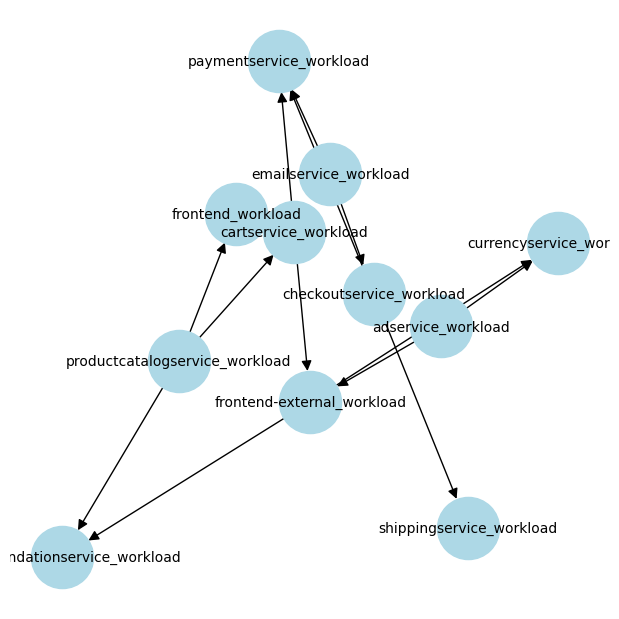

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming adj is a numpy array adjacency matrix
G = nx.DiGraph()

# Add edges based on adjacency matrix
for i in range(adj.shape[0]):
    for j in range(adj.shape[1]):
        if adj[i, j] == 1:  # edge from i → j
            G.add_edge(selected_cols[i], selected_cols[j])

# Draw the graph
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G, seed=42)  # layout for visualization
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, arrowsize=15)
plt.show()
